#### La Habana, capital de nuestro país, cuenta con aproximadamente 2.1 millones de personas según la información en el Anuario Estadístico del  2022; esta población se divide en 15 municipios, cada uno con diferentes características, y surgió la duda de si a pesar de estas diferencias entre ellos un restaurante en el céntrico Vedado(perteneciente al municipio Plaza de la Revolución) podría llegar a tener los mismos precios que uno ubicado en el municipio de Guanabacoa.

#### Así fue como comenzó la labor para responder esta interrogante dando inicio a la recopilación de datos, proceso extenuante y el más molesto de toda la tarea. Para obtener la información necesaria nos apoyamos en canales de Telegram como "Menú Cuba" o algunas de las muchas opciones que podemos encontrar con una búsqueda en Google. Pero para obtener las más recientes y exactas propuestas, se le dió vital importancia a visitar personalmente los restaurantes o bares de la capital o, como mìnimo, tratar de obtener dicha información de los dueños o trabajadores.

#### Hubieron municipios que no supusieron ningún problema para hallar un número considerable de locales, en cambio, algunos otros fueron una tarea bastante complicada debido al remota ubicación del local. Esto se podrá visualizar mejor en la gráfica a continuación, junto con algunas de las bibliotecas usadas en la realización de este análisis.

 - Anuario Estadístico: https://www.onei.gob.cu/sites/default/files/publicaciones/2024-04/03-poblacion-aec-2022_0.pdf 
 - Menu Cuba: https://t.me/menucuba

In [1]:
import sys
import os
sys.path.append(os.path.abspath('/home/ernesto/Proyectos/ProyectoCD-Prog/aux'))
import asd

univ = asd.Get_Fixed_Objets()
len(univ)



81

In [ ]:
import folium


map = folium.Map(location = [23.09016184758467,-82.38173482772923],zoom_star = 3)
for i in univ:
    if not (type(i["location"]["GPS"]) == None or i["location"]["GPS"] == "string/ latitud,longitud"):
        folium.Marker(location = i["location"]["GPS"],popup = i["nameLocal"]).add_to(map)
map

#### Existen muchos tipos de platos y bebidas pero para poder saber cual es el precio medio de una comida definimos que el consumo de una persona será el valor medio de un entrante, el valor medio de un plato fuerte, al igual que con un postre y 2 bebidas. Con estos valores podemos saber cual es el lugar más caro o mas barato para ir a comer, pero claro no es exactamente lo que queremos, nos interesa más saber que como se comportan estos precios en los municipios. Es importante recalcar que para calcular el valor medio de los platos se eliminan el 10% inferior y superior de una lista ordenada que los contiene para asi evitar ¨contaminar la muestra¨ 

Text(0.5, 1.0, 'Gasto promedio por persona')

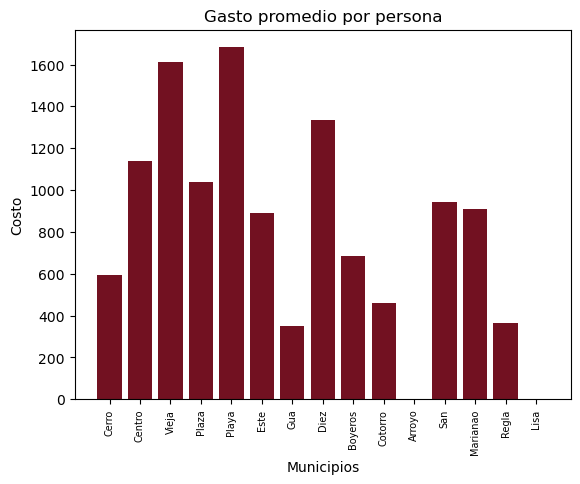

In [2]:
import matplotlib.pyplot as mplp

promediado = asd.Promedio_municipio(univ)

eje_x = []
eje_y = []

for element in promediado:
    for key, value in element.items():
        eje_x.append(key)
        eje_y.append(value)
        
mplp.bar(eje_x, eje_y, color='#721121')
mplp.xlabel("Municipios")
mplp.ylabel("Costo")
mplp.xticks(rotation=90, fontsize= 7)
mplp.title("Gasto promedio por persona")